In [ ]:
#| include: false
#| default_exp motif
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
#%load_ext autoreload
#%autoreload 2

In [ ]:
#| export
from glycowork.motif.draw import *  # noqa
from glycowork.motif.analysis import *  # noqa
from glycowork.motif.annotate import *  # noqa
from glycowork.motif.graph import *  # noqa
from glycowork.motif.processing import *  # noqa
from glycowork.motif.regex import *  # noqa
from glycowork.motif.query import *  # noqa
from glycowork.motif.tokenization import *  # noqa
from glycowork.glycan_data.loader import df_species, glycomics_data_loader, lectin_array_data_loader, glycoproteomics_data_loader  # noqa

`motif` contains many functions to process glycans in various ways and use this processing to analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `draw` contains the GlycoDraw function to draw glycans in SNFG style
- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains functions to process IUPAC-condensed glycan sequences, as well as conversion functions to convert other nomenclatures into IUPAC-condensed.
- `regex` contains functionality for performing powerful regular expression-like searches on glycans; `get_match` is the user-facing function.
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map _m/z_-->composition, composition-->structure, structure-->motif, and more

## draw
 >drawing glycans in SNFG style

In [ ]:
show_doc(GlycoDraw)

---

### GlycoDraw

```python

def GlycoDraw(
    glycan:str, # IUPAC-condensed glycan sequence
    vertical:bool=False, # Draw vertically
    compact:bool=False, # Use compact style
    show_linkage:bool=True, # Show linkage labels
    dim:float=50, # Base dimension for scaling
    highlight_motif:str | None=None, # Motif to highlight
    highlight_termini_list:list=[], # Terminal positions (from 'terminal', 'internal', and 'flexible')
    highlight_linkages:list[int] | None=None, # Which linkages to highlight in a different color; indices, starting from 0, in glycan
    reverse_highlight:bool=False, # Whether to highlight everything EXCEPT highlight_motif
    repeat:bool | int | str | None=None, # Repeat unit specification (True: n units, int: # of units, str: range of units)
    repeat_range:list[int] | None=None, # Repeat unit range
    draw_method:str | None=None, # Drawing method: None, 'chem2d', 'chem3d'
    filepath:str | pathlib.Path | None=None, # Output file path
    suppress:bool=False, # Suppress display
    per_residue:list=[], # Per-residue intensity values (order should be the same as the monosaccharides in glycan string)
    pdb_file:str | pathlib.Path | None=None, # only used when draw_method='chem3d'; already existing glycan structure
    alt_text:str | None=None, # Custom ALT text for accessibility
    libr:dict | None=None, # Can be modified for drawing too exotic monosaccharides
    reducing_end_label:str | None=None, # Label to be drawn connected to the reducing end
    restrict_vocab:bool=False, # Whether only tokens present in libr can be drawn
)->Any: # Drawing object


```

*Renders glycan structure using SNFG symbols or chemical structure representation*

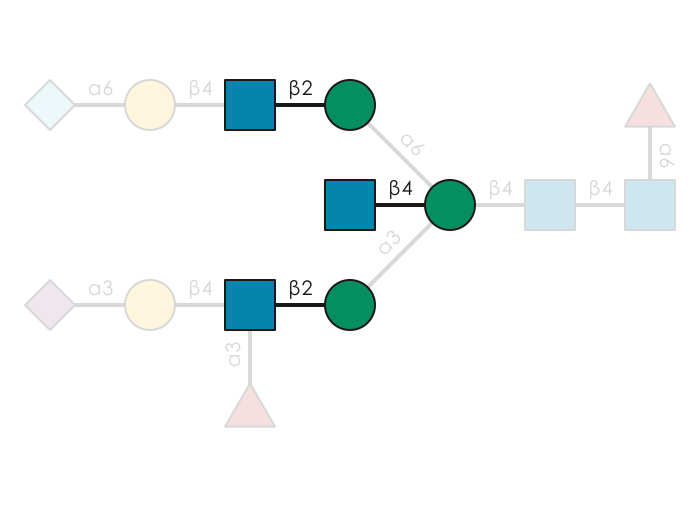

In [ ]:
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc",
         highlight_motif = "GlcNAc(b1-?)Man")

In [ ]:
show_doc(annotate_figure)

---

### annotate_figure

```python

def annotate_figure(
    svg_input:str, # Input SVG file path
    scale_range:tuple=(25, 80), # Min/max glycan dimensions
    compact:bool=False, # Use compact style
    glycan_size:str='medium', # Glycan size preset ('small', 'medium', 'large')
    filepath:str | pathlib.Path='', # Output file path
    scale_by_DE_res:pandas.core.frame.DataFrame | None=None, # Differential expression results (motif_analysis.get_differential_expression)
    x_thresh:float=1, # X metric threshold
    y_thresh:float=0.05, # P-value threshold
    x_metric:str='Log2FC', # X axis metric ('Log2FC', 'Effect size')
)->str | None: # Modified SVG code


```

*Replaces text labels with glycan drawings in SVG figure*

In [ ]:
show_doc(plot_glycans_excel)

---

### plot_glycans_excel

```python

def plot_glycans_excel(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame or filepath with glycans
    folder_filepath:str | pathlib.Path, # Output folder path
    glycan_col_num:int=0, # Glycan column index
    scaling_factor:float=0.2, # Image scaling
    compact:bool=False, # Use compact style
)->None:


```

*Creates Excel file with SNFG glycan images in a new column*

## analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

---

### get_pvals_motifs

```python

def get_pvals_motifs(
    df:pandas.core.frame.DataFrame | str, # Input dataframe or filepath (.csv/.xlsx)
    glycan_col_name:str='glycan', # Column name for glycan sequences
    label_col_name:str='target', # Column name for labels
    zscores:bool=True, # Whether data are z-scores
    thresh:float=1.645, # Threshold to separate positive/negative
    sorting:bool=True, # Sort p-value dataframe
    feature_set:list=['exhaustive'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    multiple_samples:bool=False, # Multiple samples with glycan columns
    motifs:pandas.core.frame.DataFrame | None=None, # Modified motif_list
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
)->DataFrame: # DataFrame with p-values, FDR-corrected p-values, and Cohen's d effect sizes for glycan motifs


```

*Identifies significantly enriched glycan motifs using Welch's t-test with FDR correction and Cohen's d effect size calculation, comparing samples above/below threshold*

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
out = get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:]

Glyco-Motif enrichment p-value test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,motif,pval,corr_pval,effect_size
4,GlcNAc,0.038120,0.144857,1.530905
8,Man,0.054356,0.165364,1.390253
11,Man(a1-2/3/6)Man,0.060923,0.165364,1.308333
17,Man(a1-3)Man,0.034212,0.144857,1.196586
12,GlcNAc(b1-4)GlcNAc,0.019543,0.123771,1.168815
16,Man(a1-6)Man,0.019543,0.123771,1.168815
18,Man(b1-4)GlcNAc,0.019543,0.123771,1.168815
7,Kdo,0.328790,0.496393,-0.811679
2,Glc,0.644180,0.679968,-0.811679
14,Man(a1-2)Man,0.177461,0.421470,0.772320


In [ ]:
show_doc(get_representative_substructures)

---

### get_representative_substructures

```python

def get_representative_substructures(
    enrichment_df:DataFrame, # Output from get_pvals_motifs
)->list: # Up to 10 minimal glycans containing enriched motifs


```

*Constructs minimal glycan structures that represent significantly enriched motifs by optimizing for motif content while minimizing structure size using subgraph isomorphism*

In [ ]:
show_doc(get_heatmap)

---

### get_heatmap

```python

def get_heatmap(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # Input dataframe or filepath (.csv/.xlsx)
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    transform:str='', # Transform data before plotting
    datatype:str='response', # Data type: 'response' for quantitative values or 'presence' for presence/absence
    rarity_filter:float=0.05, # Min proportion for non-zero values
    filepath:str | pathlib.Path='', # Path to save plot
    index_col:str='glycan', # Column to use as index
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    return_plot:bool=False, # Return plot object
    show_all:bool=False, # Show all tick labels
    kwargs:Any
)->typing.Any | None: # None or plot object if return_plot=True


```

*Creates hierarchically clustered heatmap visualization of glycan/motif abundances*

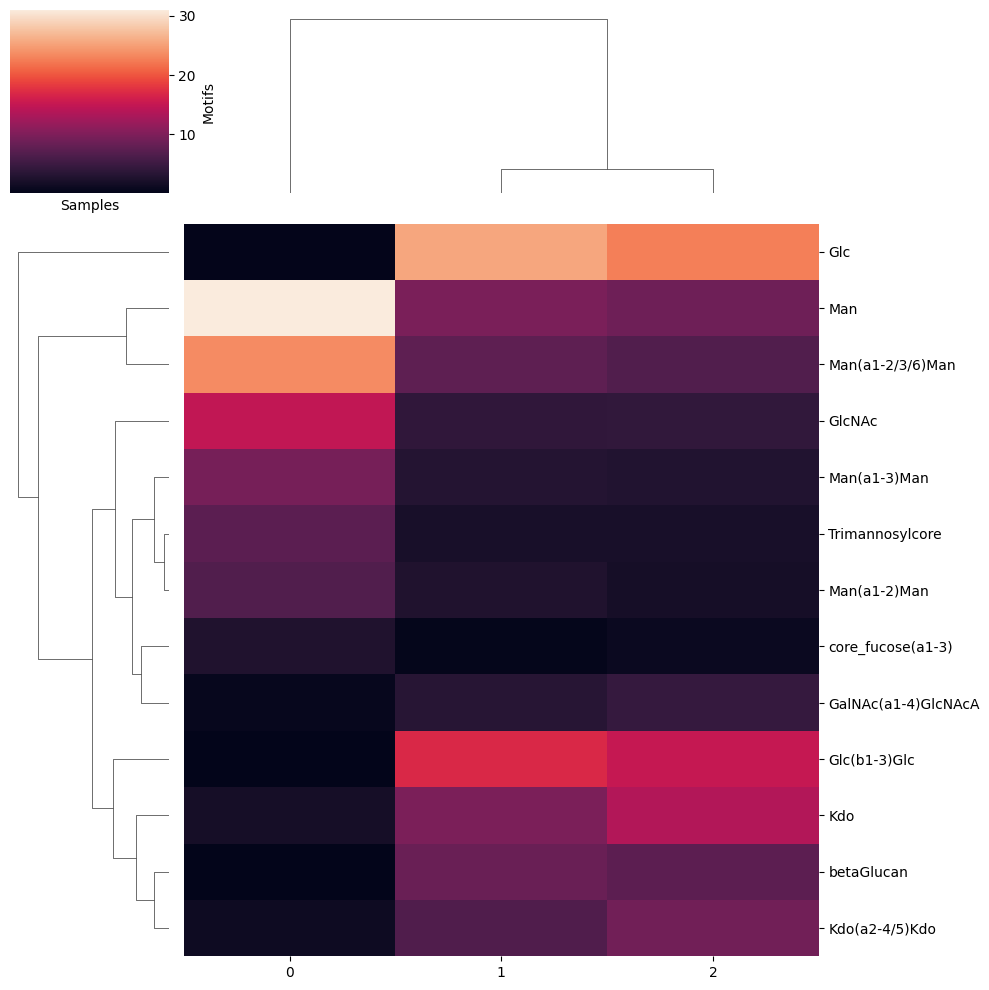

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

get_heatmap(test_df, motifs = True, feature_set = ['known', 'exhaustive'])

In [ ]:
show_doc(plot_embeddings)

---

### plot_embeddings

```python

def plot_embeddings(
    glycans:list, # List of IUPAC-condensed glycan sequences
    emb:dict[str, numpy.ndarray] | pandas.core.frame.DataFrame | None=None, # Glycan embeddings dict/DataFrame; defaults to SweetNet embeddings
    label_list:list[typing.Any] | None=None, # Labels for coloring points
    shape_feature:str | None=None, # Monosaccharide/bond for point shapes
    filepath:str | pathlib.Path='', # Path to save plot
    alpha:float=0.8, # Point transparency
    palette:str='colorblind', # Color palette for groups
    kwargs:Any
)->None: # Keyword args passed to seaborn scatterplot


```

*Visualizes learned glycan embeddings using t-SNE dimensionality reduction with optional group coloring*

Download completed.


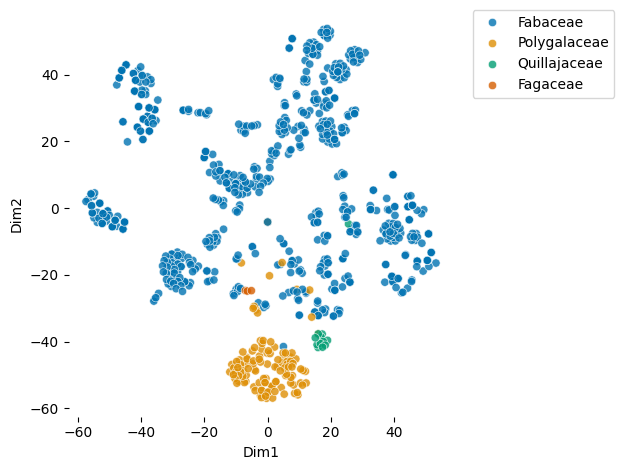

In [ ]:
df_fabales = df_species[df_species.Order == 'Fabales'].reset_index(drop = True)
plot_embeddings(df_fabales.glycan.values.tolist(), label_list = df_fabales.Family.values.tolist())

In [ ]:
show_doc(characterize_monosaccharide)

---

### characterize_monosaccharide

```python

def characterize_monosaccharide(
    sugar:str, # Monosaccharide or linkage to analyze
    df:pandas.core.frame.DataFrame | None=None, # DataFrame with glycan column 'glycan'; defaults to df_species
    mode:str='sugar', # Analysis mode: 'sugar', 'bond', 'sugarbond'
    glycan_col_name:str='glycan', # Column name for glycan sequences
    rank:str | None=None, # Column name for group filtering
    focus:str | None=None, # Row value for group filtering
    modifications:bool=False, # Consider modified monosaccharides
    filepath:str | pathlib.Path='', # Path to save plot
    thresh:int=10, # Minimum count threshold for inclusion
)->None:


```

*Analyzes connectivity and modification patterns of specified monosaccharides/linkages in glycan sequences*

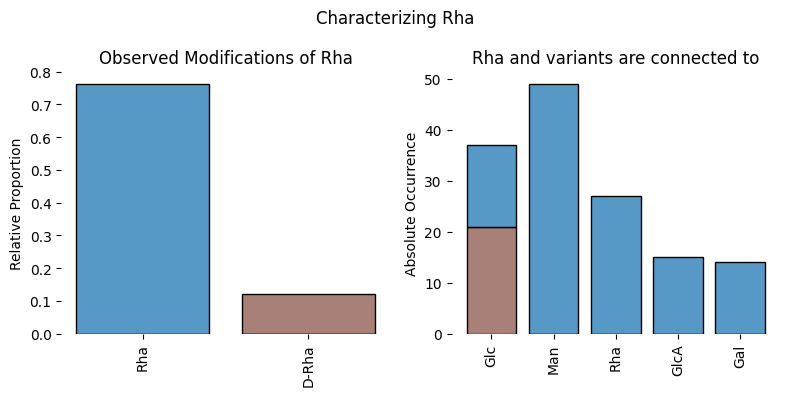

In [ ]:
characterize_monosaccharide('Rha', rank = 'Kingdom', focus = 'Fungi', modifications = True)

In [ ]:
show_doc(get_differential_expression)

---

### get_differential_expression

```python

def get_differential_expression(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1) and abundance values in subsequent columns
    group1:list, # Column indices/names for first group
    group2:list, # Column indices/names for second group
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['exhaustive', 'known'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    paired:bool=False, # Whether samples are paired
    impute:bool=True, # Replace zeros with Random Forest model
    sets:bool=False, # Identify clusters of correlated glycans
    set_thresh:float=0.9, # Correlation threshold for clusters
    effect_size_variance:bool=False, # Calculate effect size variance
    min_samples:float=0.1, # Min percent of non-zero samples required
    grouped_BH:bool=False, # Use two-stage adaptive Benjamini-Hochberg
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float | dict=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
    glycoproteomics:bool=False, # Whether data is from glycoproteomics
    level:str='peptide', # Analysis level for glycoproteomics
    monte_carlo:bool=False, # Use Monte Carlo for technical variation
    random_state:int | numpy.random._generator.Generator | None=None, # optional random state for reproducibility
)->DataFrame: # DataFrame with log2FC, p-values, FDR-corrected p-values, and Cohen's d/Mahalanobis distance effect sizes


```

*Performs differential expression analysis using Welch's t-test (or Hotelling's T2 for sets) with multiple testing correction on glycomics abundance data*

In [ ]:
test_df = glycomics_data_loader.human_skin_O_PMC5871710_BCC

res = get_differential_expression(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Glycan,Mean abundance,Log2FC,p-val,corr p-val,significant,corr Levene p-val,Effect size,Equivalence p-val
8,GalOS,0.160252,-0.930987,0.000848,0.005641,True,0.940575,-0.884455,1.000000
0,H_antigen_type2,0.247550,-0.689804,0.002058,0.005641,True,0.940575,-0.797572,1.000000
1,Internal_LacNAc_type2,2.332012,0.467133,0.002552,0.005641,True,0.940575,0.776382,1.000000
9,GlcNAc6S(b1-6)GalNAc,1.047725,0.894961,0.002820,0.005641,True,0.940575,0.766511,1.000000
13,Neu5Ac(a2-3)Gal,12.364384,0.250839,0.004655,0.007449,True,0.940575,0.716794,1.000000
2,Terminal_LacNAc_type2,2.444625,-0.475258,0.007864,0.010485,True,0.940575,-0.664152,1.000000
14,Neu5Ac(a2-8)Neu5Ac,0.038743,-0.635598,0.018773,0.021455,True,0.940575,-0.574518,1.000000
10,Neu5Ac,16.580453,0.165081,0.048618,0.048618,False,0.940575,0.471179,1.000000
6,Gal,18.570780,0.111858,0.073880,0.073880,False,0.940575,0.422987,0.739562
4,Oglycan_core1,7.969780,0.162683,0.084723,0.084723,False,0.940575,0.406721,0.739562


In [ ]:
show_doc(get_volcano)

---

### get_volcano

```python

def get_volcano(
    df_res:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame from get_differential_expression with columns [Glycan, Log2FC, p-val, corr p-val]
    y_thresh:float=0.05, # Corrected p threshold for labeling
    x_thresh:float=0, # Absolute x metric threshold for labeling
    n:int | None=None, # Sample size for Bayesian-Adaptive Alpha
    label_changed:bool=True, # Add text labels to significant points
    x_metric:str='Log2FC', # x-axis metric: 'Log2FC' or 'Effect size'
    annotate_volcano:bool=False, # Annotate dots with SNFG images
    filepath:str='', # Path to save plot
    kwargs:Any
)->None: # Displays volcano plot


```

*Creates volcano plot showing -log10(FDR-corrected p-values) vs Log2FC or effect size*

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


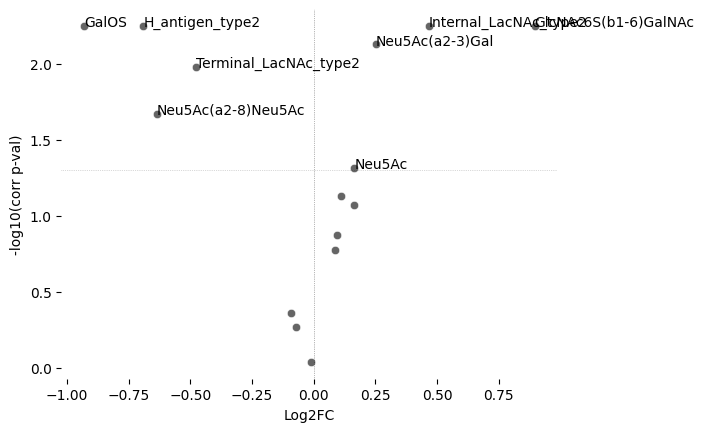

In [ ]:
get_volcano(res)

In [ ]:
show_doc(get_coverage)

---

### get_coverage

```python

def get_coverage(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1), abundances in columns
    filepath:str='', # Path to save plot
)->None:


```

*Visualizes glycan detection frequency across samples with intensity-based ordering*

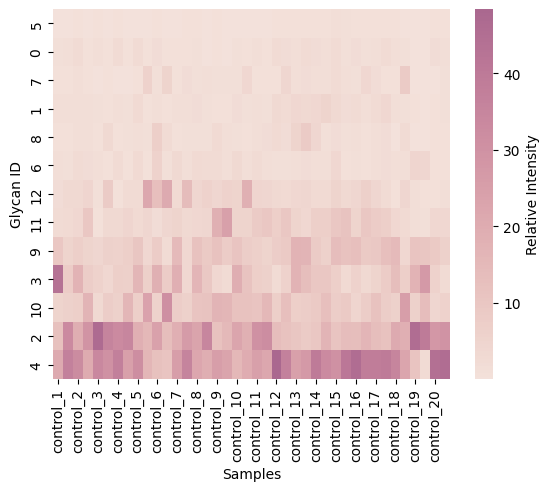

In [ ]:
test_df = pd.concat([test_df.iloc[:, 0], test_df[test_df.columns[1:]].astype(float)], axis = 1)

get_coverage(test_df)

In [ ]:
show_doc(get_pca)

---

### get_pca

```python

def get_pca(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1), abundances in columns
    groups:list[int] | pandas.core.frame.DataFrame | None=None, # Group labels (e.g., [1,1,1,2,2,2,3,3,3]) or metadata DataFrame with 'id' column
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known', 'exhaustive'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    pc_x:int=1, # Principal component for x-axis
    pc_y:int=2, # Principal component for y-axis
    color:str | None=None, # Column in metadata for color grouping; recommended to be categorical
    shape:str | None=None, # Column in metadata for shape grouping; recommended to be categorical
    size:str | None=None, # Column in metadata for point size control; recommended to be scalar
    filepath:str | pathlib.Path='', # Path to save plot
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    rarity_filter:float=0.05, # Min proportion for non-zero values
)->None:


```

*Performs PCA on glycan/motif abundance data with group-based visualization*

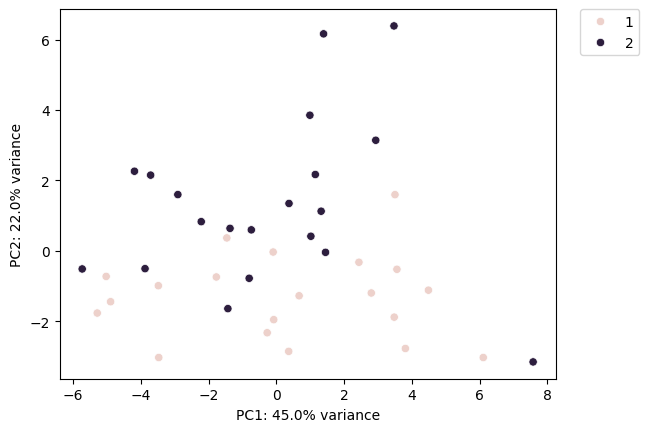

In [ ]:
get_pca(test_df, motifs = True, groups = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2])

In [ ]:
show_doc(get_pval_distribution)

---

### get_pval_distribution

```python

def get_pval_distribution(
    df_res:pandas.core.frame.DataFrame | str | pathlib.Path, # Output DataFrame from get_differential_expression
    filepath:str | pathlib.Path='', # Path to save plot
)->None:


```

*Creates histogram of p-values from differential expression analysis*

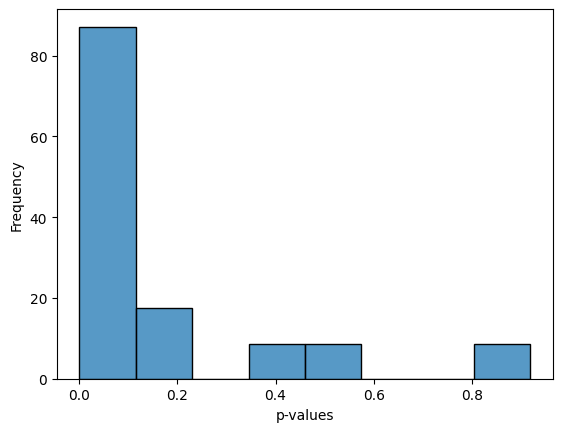

In [ ]:
get_pval_distribution(res)

In [ ]:
show_doc(get_ma)

---

### get_ma

```python

def get_ma(
    df_res:pandas.core.frame.DataFrame | str | pathlib.Path, # Output DataFrame from get_differential_expression
    log2fc_thresh:int=1, # Log2FC threshold for highlighting
    sig_thresh:float=0.05, # Significance threshold for highlighting
    filepath:str | pathlib.Path='', # Path to save plot
)->None:


```

*Generates MA plot (mean abundance vs log2 fold change) from differential expression results*

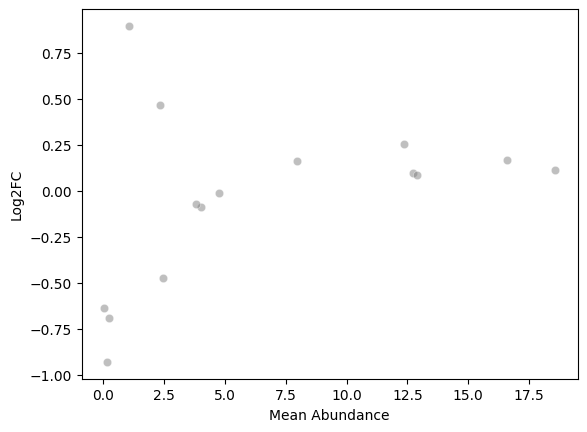

In [ ]:
get_ma(res)

In [ ]:
show_doc(get_glycanova)

---

### get_glycanova

```python

def get_glycanova(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1) and abundance values in columns
    groups:list, # Group labels for samples (e.g., [1,1,1,2,2,2,3,3,3])
    impute:bool=True, # Replace zeros with Random Forest model
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['exhaustive', 'known'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    min_samples:float=0.1, # Min percent of non-zero samples required
    posthoc:bool=True, # Perform Tukey's HSD test post-hoc
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
    random_state:int | numpy.random._generator.Generator | None=None, # optional random state for reproducibility
)->tuple: # (ANOVA results with F-stats and omega-squared effect sizes, post-hoc results)


```

*Performs one-way ANOVA with omega-squared effect size calculation and optional Tukey's HSD post-hoc testing on glycomics data across multiple groups*

In [ ]:
test_df2 = glycomics_data_loader.HIV_gagtransfection_O_PMID35112714

anv, ph = get_glycanova(test_df2, [1,1,1,1,2,2,2,2,3,3,3,3], motifs = False)
anv

You're working with an alpha of 0.06364810000741428 that has been adjusted for your sample size of 12.


,Glycan,F statistic,p-val,corr p-val,significant,Effect size
0,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,3.337354,0.082356,0.255515,False,0.182074
1,Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc,2.264846,0.159697,0.255515,False,0.107511
2,Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,2.987894,0.101120,0.255515,False,-0.097792
3,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,4.902553,0.036295,0.255515,False,0.159186
7,Neu5Ac(a2-3)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-...,2.442388,0.142124,0.255515,False,-0.072202
4,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3/6)[GlcNAc(b1-...,1.346603,0.307886,0.368114,False,0.270963
5,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,1.288259,0.322100,0.368114,False,0.031955
6,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)...,0.292927,0.752927,0.752927,False,0.026720
8,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.000000,1.000000,1.000000,False,0.120779


In [ ]:
show_doc(get_meta_analysis)

---

### get_meta_analysis

```python

def get_meta_analysis(
    effect_sizes:numpy.ndarray | list[float], # List of Cohen's d/other effect sizes
    variances:numpy.ndarray | list[float], # Associated variance estimates
    model:str='fixed', # 'fixed' or 'random' effects model
    filepath:str='', # Path to save Forest plot
    study_names:list=[], # Names corresponding to each effect size
)->tuple: # (combined effect size, two-tailed p-value)


```

*Performs fixed/random effects meta-analysis using DerSimonian-Laird method for between-study variance estimation, with optional Forest plot visualization*

In [ ]:
get_meta_analysis([-8.759, -6.363, -5.199, -3.952],
                 [7.061, 4.041, 2.919, 1.968])

(np.float64(-5.326913553837341), np.float64(3.005077298112724e-09))

In [ ]:
show_doc(get_time_series)

---

### get_time_series

```python

def get_time_series(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with sample IDs as 'sampleID_timepoint_replicate' in col 1 (e.g., T1_h5_r1)
    impute:bool=True, # Replace zeros with Random Forest model
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known', 'exhaustive'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    degree:int=1, # Polynomial degree for regression
    min_samples:float=0.1, # Min percent of non-zero samples required
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float | dict=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
)->DataFrame: # DataFrame with regression coefficients and FDR-corrected p-values


```

*Analyzes time series glycomics data using polynomial regression*

In [ ]:
t_dic = {}
t_dic["ID"] = ["D1_h5_r1", "D1_h5_r2", "D1_h5_r3", "D1_h10_r1", "D1_h10_r2", "D1_h10_r3", "D1_h15_r1", "D1_h15_r2", "D1_h15_r3"]
t_dic["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc"] = [0.33, 0.31, 0.35, 1.51, 1.57, 1.66, 2.11, 2.04, 2.09]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [0.78, 1.01, 0.98, 0.88, 1.11, 0.72, 1.22, 1.00, 0.54]
t_dic["Neu5Ac(a2-6)GalNAc"] = [0.11, 0.09, 0.14, 0.02, 0.07, 0.10, 0.11, 0.09, 0.08]
get_time_series(pd.DataFrame(t_dic).set_index("ID").T)

You're working with an alpha of 0.0694557066556809 that has been adjusted for your sample size of 9.


,Glycan,Change,p-val,corr p-val,significant
0,Fuc(a1-2)Gal(b1-3)GalNAc,-0.009300,0.415220,0.633796,False
1,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]Ga...,0.005395,0.422530,0.633796,False
2,Neu5Ac(a2-6)GalNAc,-0.001835,0.843457,0.843457,False


In [ ]:
show_doc(get_jtk)

---

### get_jtk

```python

def get_jtk(
    df_in:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (first column), then groups arranged by ascending timepoints
    timepoints:int, # Number of timepoints (each must have same number of replicates)
    interval:int, # Time units between experimental timepoints
    periods:list=[12, 24], # Timepoints per cycle to test
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known', 'exhaustive', 'terminal'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    correction_method:str='two-stage', # Multiple testing correction method
)->DataFrame: # DataFrame with JTK results: adjusted p-values, period length, lag phase, amplitude


```

*Identifies rhythmically expressed glycans using Jonckheere-Terpstra-Kendall algorithm for time series analysis*

In [ ]:
t_dic = {}
t_dic["Neu5Ac(a2-3)Gal(b1-3)GalNAc"] = [0.433138901, 0.149729209, 0.358018822, 0.537641256, 1.526963756, 1.349986672, 0.75156406, 0.736710183]
t_dic["Gal(b1-3)GalNAc"] = [0.919762334, 0.760237184, 0.725566662, 0.459945797, 0.523801515, 0.695106926, 0.627632047, 1.183511209]
t_dic["Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"] = [0.533138901, 0.119729209, 0.458018822, 0.637641256, 1.726963756, 1.249986672, 0.55156406, 0.436710183]
t_dic["Fuc(a1-2)Gal(b1-3)GalNAc"] = [3.862169504, 5.455032837, 3.858163289, 5.614650335, 3.124254095, 4.189550337, 4.641831312, 4.19538484]
tps = 8  # number of timepoints in experiment
periods = [8]  # potential cycles to test
interval = 3  # units of time between experimental timepoints
t_df = pd.DataFrame(t_dic).T
t_df.columns = ["T3", "T6", "T9", "T12", "T15", "T18", "T21", "T24"]
get_jtk(t_df.reset_index(), tps, interval, periods = periods)

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.
Significance inflation detected. The CLR/ALR transformation possibly cannot handle this dataset. Consider running again with a higher gamma value.             Proceed with caution; for now switching to Bonferroni correction to be conservative about this.


,Molecule_Name,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
0,Gal(b1-3)GalNAc,0.037499,8,12,0.785714,False
1,Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0.037499,8,12,0.785714,False
2,Neu5Ac(a2-3)Gal(b1-3)GalNAc,0.431049,8,9,0.500000,False
3,Fuc(a1-2)Gal(b1-3)GalNAc,0.694185,8,9,0.428571,False


In [ ]:
get_jtk(t_df.reset_index(), tps, interval, periods = periods, motifs = True, feature_set = ['terminal'])

You're working with an alpha of 0.22004505213567527 that has been adjusted for your sample size of 1.


,Molecule_Name,Adjusted_P_value,Period_Length,Lag_Phase,Amplitude,significant
0,Terminal_Neu5Ac(a2-3/6),0.088620,8,12,0.714286,True
1,Terminal_Neu5Ac(a2-6),0.088620,8,12,0.642857,True
2,Terminal_Neu5Ac(a2-3),0.216933,8,9,0.428571,True
3,Terminal_Gal(b1-3),0.216933,8,12,0.428571,True
4,Terminal_Fuc(a1-2),0.386476,8,3,0.285714,False


In [ ]:
show_doc(get_biodiversity)

---

### get_biodiversity

```python

def get_biodiversity(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1), abundances in columns
    group1:list, # First group column indices or group labels
    group2:list, # Second group indices or additional group labels
    metrics:list=['alpha', 'beta'], # Diversity metrics to calculate
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['exhaustive', 'known'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    paired:bool=False, # Whether samples are paired
    permutations:int=999, # Number of permutations for ANOSIM/PERMANOVA
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float | dict=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
    random_state:int | numpy.random._generator.Generator | None=None, # optional random state for reproducibility
)->DataFrame: # DataFrame with diversity indices and test statistics


```

*Calculates alpha (Shannon/Simpson) and beta (ANOSIM/PERMANOVA) diversity measures from glycomics data*

In [ ]:
res = get_biodiversity(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)
res

You're working with an alpha of 0.044390023979542614 that has been adjusted for your sample size of 40.


,Metric,Group1 mean,Group2 mean,p-val,Effect size,corr p-val,significant
0,simpson_diversity,0.876445,0.874168,0.000520,-0.932303,0.000520,True
1,shannon_diversity,2.242778,2.224732,0.001402,-0.835249,0.001402,True
2,Beta diversity (PERMANOVA),NaN,NaN,0.003003,43.631689,0.003003,True
3,Beta diversity (ANOSIM),NaN,NaN,0.004004,0.146395,0.004004,True
4,species_richness,15.000000,15.000000,1.000000,0.000000,1.000000,False


In [ ]:
show_doc(get_SparCC)

---

### get_SparCC

```python

def get_SparCC(
    df1:pandas.core.frame.DataFrame | str | pathlib.Path, # First DataFrame with glycans in rows (col 1) and abundances in columns
    df2:pandas.core.frame.DataFrame | str | pathlib.Path, # Second DataFrame with same format as df1
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known', 'exhaustive'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    partial_correlations:bool=False, # Use regularized partial correlations
)->tuple: # (Spearman correlation matrix, FDR-corrected p-value matrix)


```

*Calculates SparCC (Sparse Correlations for Compositional Data) between two matching datasets (e.g., glycomics)*

You're working with an alpha of 0.04787928055709467 that has been adjusted for your sample size of 31.


<seaborn.matrix.ClusterGrid>

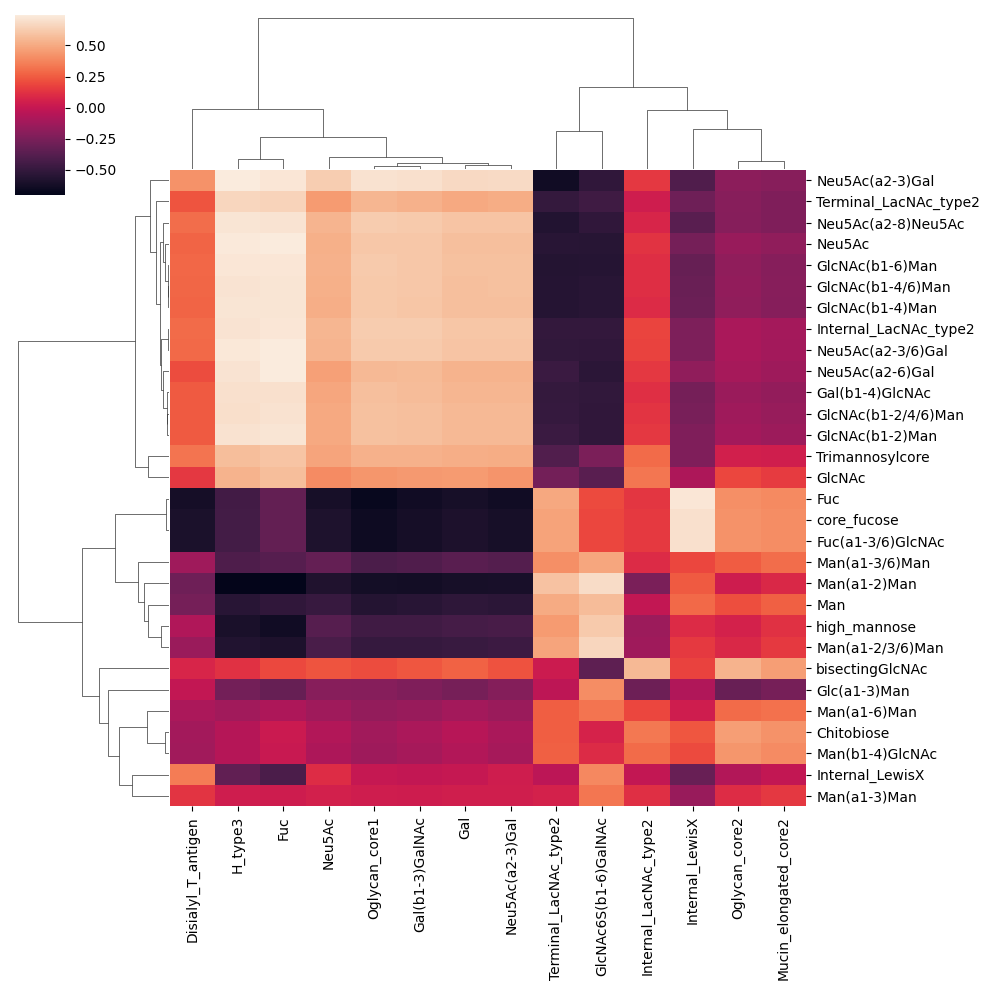

In [ ]:
df1 = glycomics_data_loader.time_series_N_PMID32149347
df2 = glycomics_data_loader.time_series_O_PMID32149347
df1 = pd.merge(df1, df2[['ID']], on = 'ID', how = 'inner')
df2 = pd.merge(df2, df1[['ID']], on = 'ID', how = 'inner')
df1 = df1.set_index(df1.columns.tolist()[0]).T.reset_index()
df2 = df2.set_index(df2.columns.tolist()[0]).T.reset_index()

corr, pval = get_SparCC(df1, df2, motifs = True, transform = "CLR")
sns.clustermap(corr)

In [ ]:
show_doc(get_roc)

---

### get_roc

```python

def get_roc(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with glycans in rows (col 1), abundances in columns
    group1:list, # First group indices/names
    group2:list, # Second group indices/names
    motifs:bool=False, # Analyze motifs instead of sequences
    feature_set:list=['known', 'exhaustive'], # Feature sets to use; exhaustive, known, terminal1, terminal2, terminal3, chemical, graph, custom, size_branch
    paired:bool=False, # Whether samples are paired
    impute:bool=True, # Replace zeros with Random Forest model
    min_samples:float=0.1, # Min percent of non-zero samples required
    custom_motifs:list=[], # Custom motifs if using 'custom' feature set
    transform:str | None=None, # Transformation type: "CLR" or "ALR"
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float | dict=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
    filepath:str | pathlib.Path='', # Path to save ROC plot
    multi_score:bool=False, # Find best multi-glycan score
    random_state:int | numpy.random._generator.Generator | None=None, # optional random state for reproducibility
)->list[tuple[str, float]] | dict[typing.Any, tuple[str, float]] | tuple[sklearn.linear_model._logistic.LogisticRegression, float]: # (Feature scores with ROC AUC values)


```

*Calculates ROC curves and AUC scores for glycans/motifs or multi-glycan classifiers*

[('GlcNAc6S(b1-6)GalNAc', 0.7599999999999999),
 ('Internal_LacNAc_type2', 0.715),
 ('Neu5Ac(a2-3)Gal', 0.6699999999999999),
 ('Neu5Ac', 0.65),
 ('Oglycan_core1', 0.6224999999999999),
 ('Gal', 0.6),
 ('Gal(b1-3)GalNAc', 0.5874999999999999),
 ('GalNAc', 0.585),
 ('Mucin_elongated_core2', 0.4975),
 ('Disialyl_T_antigen', 0.465),
 ('Neu5Ac(a2-6)GalNAc', 0.4525),
 ('Neu5Ac(a2-8)Neu5Ac', 0.37000000000000005),
 ('H_antigen_type2', 0.2625),
 ('Terminal_LacNAc_type2', 0.2625),
 ('GalOS', 0.2475)]

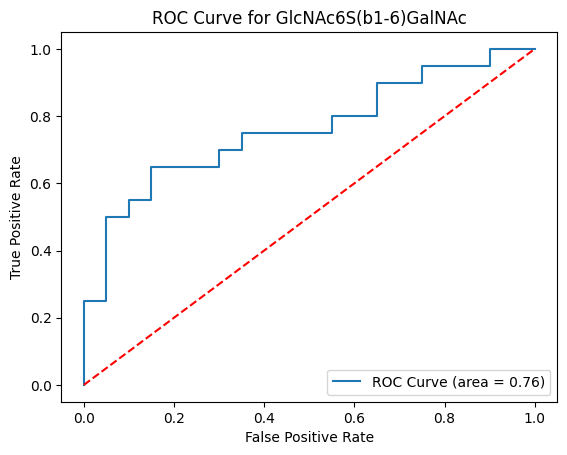

In [ ]:
get_roc(test_df, group1 = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39],
                                  group2 = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40], motifs = True, paired = True)

In [ ]:
show_doc(get_lectin_array)

---

### get_lectin_array

```python

def get_lectin_array(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with samples as rows and lectins as columns, first column containing sample IDs
    group1:list, # First group indices/names
    group2:list, # Second group indices/names
    paired:bool=False, # Whether samples are paired
    transform:str='', # Optional log2 transformation
)->DataFrame: # DataFrame with altered glycan motifs, supporting lectins, and effect sizes


```

*Analyzes lectin microarray data by mapping lectin binding patterns to glycan motifs, calculating Cohen's d effect sizes between groups and clustering results by significance*

In [ ]:
lectin_df = lectin_array_data_loader.A549_influenza_PMID33046650
get_lectin_array(lectin_df, [5,6,7], [8,9,10])

Lectin "Ab-LeB-1" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "APP" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group B [CLCP-19B]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Blood Group H2" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CA19-9 [121SLE]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CCA" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [ICRF29-2]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [MY-1]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "CD15 [SP-159]" is not found in our annotated lectin library and is excluded from analysis.
Lectin "Forssman" is not found 

,motif,named_motifs,lectin(s),change,score,significance
39,Neu5Ac(a2-6)Gal(b1-3)GlcNAc,[Internal_LacNAc_type1],"PSL, SNA, TJA-I, BDA, BPA, WGA_1, WGA_2",down,11.32,highly significant
38,Neu5Ac(a2-6)Gal(b1-4)GlcNAc,[Internal_LacNAc_type2],"PSL, SNA, TJA-I, BDA, BPA, ECA, RCA120, Ricin ...",down,10.81,highly significant
7,Man(a1-2),[],"ASA, Con A, CVN, HHL, SVN_1, GRFT, SVN_2, SNA-...",up,4.83,moderately significant
14,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","CA, CAA, DSA_1, DSA_2, DSA_3, AMA, BDA, BPA, C...",up,3.51,moderately significant
4,Gal(b1-3)GalNAc,[Oglycan_core1],"ACA, AIA, MPA, PNA_1, PNA_2, BDA, BPA",up,3.48,moderately significant
43,Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc,[Internal_LacdiNAc_type2],"SNA, CSA, SBA, VVA_1, VVA_2, WFA, BPA, ECA, ST...",down,2.86,moderately significant
10,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-4)][G...,"[Chitobiose, Trimannosylcore, Terminal_LacNAc_...","Blackbean, Calsepa, PHA-E_1, PHA-E_2, AMA, BDA...",up,2.70,moderately significant
16,Fuc(a1-2)Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Ga...,"[Internal_LacNAc_type2, H_type3]","Cholera Toxin, AAA, AAL, ACA, AIA, AOL, BDA, B...",up,2.51,moderately significant
15,Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-3)]Gal(b1-4)Gl...,[Internal_LacNAc_type2],"Cholera Toxin, ACA, AIA, BDA, BPA, CSA, ECA, L...",up,2.46,moderately significant
47,GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Ma...,"[Chitobiose, Trimannosylcore, core_fucose]","TL, AAL, AMA, AOL, Con A, GNA, GNL, HHL, LcH, ...",up,2.36,moderately significant


In [ ]:
show_doc(get_glycoshift_per_site)

---

### get_glycoshift_per_site

```python

def get_glycoshift_per_site(
    df:pandas.core.frame.DataFrame | str | pathlib.Path, # DataFrame with rows formatted as 'protein_site_composition' in col 1, abundances in remaining cols
    group1:list, # First group indices/names or group labels for multi-group
    group2:list, # Second group indices/names
    paired:bool=False, # Whether samples are paired
    impute:bool=True, # Replace zeros with Random Forest model
    min_samples:float=0.2, # Min percent of non-zero samples required
    gamma:float=0.1, # Uncertainty parameter for CLR transform
    custom_scale:float | dict=0, # Ratio of total signal in group2/group1 for an informed scale model (or group_idx: mean(group)/min(mean(groups)) signal dict for multivariate)
    random_state:int | numpy.random._generator.Generator | None=None, # optional random state for reproducibility
)->DataFrame: # DataFrame with GLM coefficients and FDR-corrected p-values


```

*Analyzes site-specific glycosylation changes in glycoproteomics data using generalized linear models (GLM) with compositional data normalization*

In [ ]:
df_milk = glycoproteomics_data_loader.human_milk_N_PMID34087070

get_glycoshift_per_site(df_milk, ['Colostrum1', 'Colostrum2', 'Colostrum3'], ['Mature1', 'Mature2', 'Mature3'])

You're working with an alpha of 0.07862467893233027 that has been adjusted for your sample size of 6.


,Condition_coefficient,Condition_corr_pval,Condition_significant,high_Man_Condition_coefficient,high_Man_Condition_corr_pval,high_Man_Condition_significant,hybrid_Condition_coefficient,hybrid_Condition_corr_pval,hybrid_Condition_significant,Neu5Ac_Condition_coefficient,...,antennary_Fuc_Condition_significant,dHex_Condition_coefficient,dHex_Condition_corr_pval,dHex_Condition_significant,HexNAc_Condition_coefficient,HexNAc_Condition_corr_pval,HexNAc_Condition_significant,Hex_Condition_coefficient,Hex_Condition_corr_pval,Hex_Condition_significant
sp|P01024|CO3_85,-13.741464,0.000000e+00,True,-13.741464,0.000000,True,-13.741464,0.000000e+00,True,0.000000,...,False,0.000000,1.000000e+00,False,-27.482928,0.000000e+00,True,12.821387,0.000000e+00,True
sp|P47710|CASA1_69,0.351306,0.000000e+00,True,0.000000,1.000000,False,0.351306,0.000000e+00,True,0.351306,...,False,3.651421,0.000000e+00,True,1.405226,0.000000e+00,True,-1.543583,0.000000e+00,True
sp|P10909|CLUS_103,-0.148812,0.000000e+00,True,0.000000,1.000000,False,-4.609878,0.000000e+00,True,4.312254,...,False,-0.148812,0.000000e+00,True,-0.595249,0.000000e+00,True,-0.744062,0.000000e+00,True
sp|Q13410|BT1A1_55,-13.032160,1.632815e-86,True,0.000000,1.000000,False,-8.873947,1.136641e-42,True,-17.190373,...,True,0.530115,4.007150e-01,False,12.400217,4.919813e-91,True,-0.631943,1.290904e-18,True
sp|P01011|AACT_106,-0.027180,8.973881e-15,True,0.000000,1.000000,False,2.529792,0.000000e+00,True,-2.584152,...,True,2.502612,0.000000e+00,True,-0.108721,8.973881e-15,True,-0.135901,8.973881e-15,True
sp|P00709|LALBA_90,-1.256621,1.737034e-08,True,0.000000,1.000000,False,-0.701834,4.151344e-01,False,-1.811408,...,False,7.335961,2.957124e-28,True,-5.026485,1.737034e-08,True,3.643645,1.656325e-06,True
sp|P02749|APOH_253,-0.002492,2.356643e-06,True,0.000000,1.000000,False,0.000000,1.000000e+00,False,-0.004984,...,False,0.000000,1.000000e+00,False,-0.009968,2.356643e-06,True,-0.012460,2.356643e-06,True
sp|P00738|HPT_241,0.001144,1.133736e-04,True,0.000000,1.000000,False,0.000000,1.000000e+00,False,0.002289,...,False,0.000000,1.000000e+00,False,0.004578,1.133736e-04,True,0.005722,1.133736e-04,True
sp|P02765|FETUA_156,-0.002672,3.394518e-03,True,0.000000,1.000000,False,0.000000,1.000000e+00,False,-0.005343,...,False,0.000000,1.000000e+00,False,-0.010686,3.394518e-03,True,-0.013358,3.394518e-03,True
sp|P01871|IGHM_46,-0.000319,7.588850e-02,True,0.000000,1.000000,False,-0.000319,9.443902e-02,False,-0.000319,...,False,-0.000319,1.214216e-01,False,-0.001275,7.588850e-02,True,-0.001594,7.588850e-02,True


## annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(annotate_glycan)

---

### annotate_glycan

```python

def annotate_glycan(
    glycan:str | networkx.classes.digraph.DiGraph, # IUPAC-condensed glycan sequence or NetworkX graph
    motifs:pandas.core.frame.DataFrame | None=None, # Motif dataframe (name + sequence); defaults to motif_list
    termini_list:list=[], # Monosaccharide positions: 'terminal', 'internal', or 'flexible'
    gmotifs:list[networkx.classes.digraph.DiGraph] | None=None, # Precalculated motif graphs for speed
)->DataFrame: # DataFrame with motif counts for the glycan


```

*Counts occurrences of known motifs in a glycan structure using subgraph isomorphism*

In [ ]:
annotate_glycan("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,...,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,DisialylLewisC,RM2,DisialylLewisA
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(annotate_dataset)

---

### annotate_dataset

```python

def annotate_dataset(
    glycans:list, # List of IUPAC-condensed glycan sequences
    motifs:pandas.core.frame.DataFrame | None=None, # Motif dataframe (name + sequence); defaults to motif_list
    feature_set:list=['known'], # Feature types to analyze: known, graph, exhaustive, terminal(1-3), custom, chemical, size_branch
    termini_list:list=[], # Monosaccharide positions: 'terminal', 'internal', or 'flexible'
    condense:bool=False, # Remove columns with only zeros
    custom_motifs:list=[], # Custom motifs when using 'custom' feature set
)->DataFrame: # DataFrame mapping glycans to presence/absence of motifs


```

*Comprehensive glycan annotation combining multiple feature types: structural motifs, graph properties, terminal sequences*

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
print("Annotate Test")
out = annotate_dataset(glycans)

Annotate Test


In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

motif_name,Terminal_LewisX,Internal_LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,Terminal_LewisA,Internal_LewisA,LewisB,SialylLewisA,SulfoLewisA,H_antigen_type2,H_antigen_type1,H_antigen_type3,A_antigen,A_antigen_type1,A_antigen_type2,A_antigen_type3,B_antigen,B_antigen_type1,B_antigen_type2,ExtB,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,Internal_LacNAc_type1,Terminal_LacNAc_type1,Internal_LacNAc_type2,Terminal_LacNAc_type2,Internal_LacdiNAc_type1,Terminal_LacdiNAc_type1,Internal_LacdiNAc_type2,Terminal_LacdiNAc_type2,bisectingGlcNAc,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series(LewisC),NeoLacto_Series,betaGlucan,KeratanSulfate,Hyaluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,Sda,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Fuc_LN3,GT1b,GD1,GD1a_2,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,core_fucose(a1-3),GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,Gala_series,LPS_core,Nglycan_complex,Nglycan_complex2,Oglycan_core1,Oglycan_core2,Oglycan_core3,Oglycan_core4,Oglycan_core5,Oglycan_core6,Oglycan_core7,Xylogalacturonan,Sialosylparagloboside,LDNF,OFuc,Arabinogalactan_type2,EGF_repeat,Nglycan_hybrid,Arabinan,Xyloglucan,Acharan_Sulfate,M3FX,M3X,1-6betaGalactan,Arabinogalactan_type1,Galactomannan,Tetraantennary_Nglycan,Mucin_elongated_core2,Fucoidan,Alginate,FG,XX,Difucosylated_core,GalFuc_core,DisialylLewisC,RM2,DisialylLewisA
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
show_doc(quantify_motifs)

---

### quantify_motifs

```python

def quantify_motifs(
    df:str | pandas.core.frame.DataFrame, # DataFrame or filepath with samples as columns, abundances as values
    glycans:list, # List of IUPAC-condensed glycan sequences
    feature_set:list, # Feature types to analyze: known, graph, exhaustive, terminal(1-3), custom, chemical, size_branch
    custom_motifs:list=[], # Custom motifs when using 'custom' feature set
    remove_redundant:bool=True, # Remove redundant motifs via deduplicate_motifs
)->DataFrame: # DataFrame with motif abundances (motifs as columns, samples as rows)


```

*Extracts and quantifies motif abundances from glycan abundance data by weighting motif occurrences*

In [ ]:
quantify_motifs(test_df.iloc[:, 1:], test_df.iloc[:, 0].values.tolist(), ['known', 'exhaustive'])

,control_1,tumor_1,control_2,tumor_2,control_3,tumor_3,control_4,tumor_4,control_5,tumor_5,...,control_16,tumor_16,control_17,tumor_17,control_18,tumor_18,control_19,tumor_19,control_20,tumor_20
H_antigen_type2,1.347737,0.892651,2.468405,1.810795,1.589162,0.449339,2.640132,0.572828,2.763890,0.737076,...,1.070249,0.647786,1.440912,1.810304,1.722289,1.475260,4.847788,4.552496,0.480035,0.494123
Internal_LacNAc_type2,8.845085,10.063160,13.435501,28.834006,5.585973,11.359659,11.672584,21.193308,12.734919,28.597709,...,10.883437,17.991155,21.166792,16.161351,11.909325,29.924308,12.820872,19.107379,8.802443,10.268911
Terminal_LacNAc_type2,52.982192,13.183951,24.413523,12.870782,9.555884,9.822266,12.628910,13.916662,26.569737,10.733867,...,18.779972,12.157928,14.828507,20.879287,27.689619,10.734756,28.328965,37.870847,14.835019,8.910804
Disialyl_T_antigen,20.803836,36.895471,32.803297,20.401157,33.971366,30.150599,37.703636,24.728411,31.798990,15.989214,...,46.337629,39.476930,39.087708,40.348217,35.791797,22.968160,11.026029,2.613718,44.676379,46.125360
Oglycan_core1,37.329013,75.567842,59.998893,57.608119,83.293693,78.436161,73.308916,64.356888,58.197862,60.329536,...,68.269613,68.762287,62.541874,60.699726,58.713271,58.203265,58.826129,42.904325,74.390026,79.515568
Mucin_elongated_core2,61.827277,23.247111,37.849024,41.704788,15.141858,21.181925,24.301494,35.109970,39.304656,39.331576,...,29.663409,30.149083,35.995300,37.040638,39.598944,40.659064,41.149838,56.978227,23.637462,19.179715
Gal,163.691481,126.500106,141.895063,147.702533,115.056369,132.721945,122.804259,138.398297,141.412183,167.203077,...,133.838024,140.218313,142.530133,139.697255,138.848449,154.791018,142.588964,157.426027,122.916027,120.555251
GalNAc,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
GalOS,0.843710,1.185047,2.152084,0.687093,1.564450,0.381914,2.389590,0.533142,2.497482,0.338889,...,2.066978,1.088630,1.462826,2.259636,1.687785,1.137672,0.024033,0.117449,1.972512,1.304717
GlcNAc6S(b1-6)GalNAc,2.707913,4.438043,6.198123,6.684838,1.478960,11.921934,0.892356,3.821469,4.605009,28.210391,...,6.241593,11.157860,7.997660,4.916252,0.937290,15.269626,1.463159,0.565249,1.251077,2.680253


In [ ]:
show_doc(get_k_saccharides)

---

### get_k_saccharides

```python

def get_k_saccharides(
    glycans:list[str] | set[str], # List or set of IUPAC-condensed glycan sequences
    size:int=2, # Number of monosaccharides per fragment
    up_to:bool=False, # Include fragments up to size k (adds monosaccharides)
    just_motifs:bool=False, # Return nested list of motifs instead of count DataFrame
    terminal:bool=False, # Only count terminal fragments
)->pandas.core.frame.DataFrame | list[list[str]]: # DataFrame of k-saccharide counts or list of motifs per glycan


```

*Extracts k-saccharide fragments from glycan sequences with options for different fragment sizes and positions*

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcN4P(b1-6)GlcN4P']
out = get_k_saccharides(glycans, size = 3)

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,Xyl(b1-2)Man,Man(a1-2/3/6)Man,GlcN4P(b1-6)GlcN4P,GlcNAc(b1-4)GlcNAc,Fuc(a1-3)GlcNAc,Kdo(a2-5)Kdo,Kdo(a2-4/5)Kdo,Man(a1-2)Man,Kdo(a2-4)Kdo,Man(a1-6)Man,GlcNAcA(a1-4)Kdo,GlcN(b1-7)Kdo,Kdo(a2-6)GlcN4P,Man(a1-3)Man,GalNAc(a1-4)GlcNAcA,Man(b1-4)GlcNAc,GalNAc(a1-4)GlcNAcA(a1-4)Kdo,Kdo(a2-4)Kdo(a2-6)GlcN4P,GlcNAcA(a1-4)[GlcN(b1-7)]Kdo,Man(b1-4)GlcNAc(b1-4)GlcNAc,Man(a1-3)[Man(a1-6)]Man,Xyl(b1-2)[Man(a1-3)]Man,Man(a1-2/3)Man(a1-2/3/6)Man,Kdo(a2-4/5)Kdo(a2-6)GlcN4P,Kdo(a2-6)GlcN4P(b1-6)GlcN4P,Xyl(b1-2)[Man(a1-6)]Man,Man(a1-3/6)Man(b1-4)GlcNAc,Fuc(a1-3)[GlcNAc(b1-4)]GlcNAc,Man(a1-6)Man(b1-4)GlcNAc,Xyl(b1-2)Man(b1-4)GlcNAc,Man(a1-3)Man(b1-4)GlcNAc,Man(a1-2)Man(a1-3)Man,GlcNAcA(a1-4)Kdo(a2-5)Kdo,Kdo(a2-4)[Kdo(a2-5)]Kdo,GlcN(b1-7)Kdo(a2-5)Kdo,Kdo(a2-5)Kdo(a2-6)GlcN4P,Xyl(b1-2)[Man(a1-3/6)]Man,Man(a1-2)Man(a1-2)Man,Man(a1-3)Man(a1-6)Man
0,1,2,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,2,1,1,1,1,0,0,0,0,0,2,0,0
1,0,5,0,1,0,0,0,2,0,1,0,0,0,2,0,1,0,0,0,1,1,0,3,0,0,0,2,0,1,0,1,1,0,0,0,0,0,1,1
2,0,0,1,0,0,1,2,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0


In [ ]:
show_doc(get_terminal_structures)

---

### get_terminal_structures

```python

def get_terminal_structures(
    glycan:str | networkx.classes.digraph.DiGraph, # IUPAC-condensed glycan sequence or NetworkX graph
    size:int=1, # Number of monosaccharides in terminal fragment (1 or higher)
)->list: # List of terminal structures with linkages


```

*Identifies terminal monosaccharide sequences from non-reducing ends of glycan structure*

In [ ]:
get_terminal_structures("Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc")

['Neu5Ac(a2-3)', 'Neu5Ac(a2-6)']

In [ ]:
show_doc(get_molecular_properties)

---

### get_molecular_properties

```python

def get_molecular_properties(
    glycan_list:list, # List of IUPAC-condensed glycan sequences
    verbose:bool=False, # Print SMILES not found on PubChem
    placeholder:bool=False, # Return dummy values instead of dropping failed requests
)->DataFrame: # DataFrame with molecular parameters from PubChem


```

*Retrieves molecular properties from PubChem for a list of glycans using their SMILES representations*

In [ ]:
out = get_molecular_properties(["Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"])

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

,bond_stereo_count,tpsa,xlogp,undefined_atom_stereo_count,charge,atom_stereo_count,defined_bond_stereo_count,complexity,h_bond_acceptor_count,h_bond_donor_count,molecular_weight,monoisotopic_mass,heavy_atom_count,exact_mass,isotope_atom_count,undefined_bond_stereo_count,rotatable_bond_count,defined_atom_stereo_count,covalent_unit_count
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,1070,-23.600000,1,0,57,0,4410,62,39,2224.0,2222.7830048,152,2222.7830048,0,0,43,56,1


In [ ]:
show_doc(get_glycan_similarity)

---

### get_glycan_similarity

```python

def get_glycan_similarity(
    glycan1:str | networkx.classes.digraph.DiGraph, # IUPAC-condensed glycan sequence or NetworkX graph
    glycan2:str | networkx.classes.digraph.DiGraph, # IUPAC-condensed glycan sequence or NetworkX graph
    motifs:pandas.core.frame.DataFrame | None=None, # Motif dataframe (name + sequence); defaults to motif_list
    feature_set:list=['known', 'exhaustive', 'terminal'], # Feature types to analyze: known, graph, exhaustive, terminal(1-3), custom, chemical, size_branch
)->float: # Cosine similarity between glycan1 and glycan2


```

*Calculates cosine similarity between two glycans based on their motif count fingerprints*

In [ ]:
get_glycan_similarity("Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc", "Neu5Ac(a2-3)Gal(b1-4)[Neu5Ac(a2-6)]GlcNAc")

np.float64(0.7276068751089989)

## graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_nxGraph)

---

### glycan_to_nxGraph

```python

def glycan_to_nxGraph(
    glycan:str, # Glycan in IUPAC-condensed format
    libr:glycowork.glycan_data.loader.HashableDict[str, int] | None=None, # Dictionary of form glycoletter:index
    termini:str='ignore', # How to encode terminal/internal position; options: ignore, calc, provided
    termini_list:tuple[str] | None=None, # List of positions from terminal/internal/flexible
)->DiGraph: # NetworkX graph object of glycan


```

*Wrapper for converting glycans into networkx graphs; also works with floating substituents*

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(1, np.int64(0)), (3, np.int64(2)), (4, np.int64(1)), (4, np.int64(3)), (5, np.int64(4)), (6, np.int64(5)), (7, np.int64(6)), (9, np.int64(8)), (10, np.int64(7)), (10, np.int64(9))]


In [ ]:
show_doc(graph_to_string)

---

### graph_to_string

```python

def graph_to_string(
    graph:DiGraph, # Glycan graph (assumes root node is the one with the highest index)
    canonicalize:bool=True, # Whether to output canonicalized IUPAC-condensed
    order_by:str='length', # canonicalize by 'length' or 'linkage'
)->str: # IUPAC-condensed glycan string


```

*Convert glycan graph back to IUPAC-condensed format, handling disconnected components*

In [ ]:
graph_to_string(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

In [ ]:
show_doc(compare_glycans)

---

### compare_glycans

```python

def compare_glycans(
    glycan_a:str | networkx.classes.digraph.DiGraph, # First glycan to compare
    glycan_b:str | networkx.classes.digraph.DiGraph, # Second glycan to compare
    return_matches:bool=False, # Whether to return node mapping between glycans
)->bool: # True if glycans are same, False if not


```

*Check whether two glycans are identical*

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(subgraph_isomorphism)

---

### subgraph_isomorphism

```python

def subgraph_isomorphism(
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan sequence or graph
    motif:str | networkx.classes.digraph.DiGraph, # Glycan motif sequence or graph
    termini_list:list=[], # List of monosaccharide positions from terminal/internal/flexible
    count:bool=False, # Whether to return count instead of presence/absence
    return_matches:bool=False, # Whether to return matched subgraphs as node lists
)->bool | int | tuple[int, list[list[int]]]: # Boolean presence, count, or (count, matches)


```

*Check if motif exists as subgraph in glycan*

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(generate_graph_features)

---

### generate_graph_features

```python

def generate_graph_features(
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan sequence or network graph
    glycan_graph:bool=True, # True if input is glycan, False if network
    label:str='network', # Label for output dataframe if glycan_graph=False
)->DataFrame: # Dataframe of graph features


```

*Compute graph features of glycan or network*

In [ ]:
generate_graph_features("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,...,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,secorderMax,secorderMin,secorderAvg,secorderVar,egap,entropyStation
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,8,1,3,1.818182,0.330579,3.0,0,3.0,3.0,-1.850372e-15,...,0.333333,0.111111,0.217778,0.007289,45.607017,20.736441,31.679285,62.422895,0.340654,-2.180184


In [ ]:
show_doc(largest_subgraph)

---

### largest_subgraph

```python

def largest_subgraph(
    glycan_a:str | networkx.classes.digraph.DiGraph, # First glycan
    glycan_b:str | networkx.classes.digraph.DiGraph, # Second glycan
)->str: # Largest common subgraph in IUPAC format


```

*Find the largest common subgraph of two glycans*

In [ ]:
glycan1 = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
glycan2 = 'Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
largest_subgraph(glycan1, glycan2)

'Fuc(a1-6)GlcNAc'

In [ ]:
show_doc(ensure_graph)

---

### ensure_graph

```python

def ensure_graph(
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan in IUPAC-condensed format or as networkx graph
    kwargs:VAR_KEYWORD
)->DiGraph: # NetworkX graph object of glycan


```

*Ensures function compatibility with string glycans and graph glycans*

In [ ]:
ensure_graph("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

<networkx.classes.digraph.DiGraph>

In [ ]:
show_doc(get_possible_topologies)

---

### get_possible_topologies

```python

def get_possible_topologies(
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan with floating substituent
    exhaustive:bool=False, # Whether to allow additions at internal positions
    allowed_disaccharides:set[str] | None=None, # Permitted disaccharides when creating possible glycans
    modification_map:dict={'6S': {'Gal', 'GlcNAc'}, '3S': {'Gal'}, '4S': {'GalNAc'}, 'OS': {'GalNAc', 'Gal', 'GlcNAc'}}, # Maps modifications to valid attachments
    return_graphs:bool=False, # Whether to return glycan graphs (otherwise return converted strings)
)->list: # List of possible topology strings or graphs


```

*Create possible glycan graphs given a floating substituent*

In [ ]:
show_doc(possible_topology_check)

---

### possible_topology_check

```python

def possible_topology_check(
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan with floating substituent
    glycans:list, # List of glycans to check against
    exhaustive:bool=False, # Whether to allow additions at internal positions
    kwargs:VAR_KEYWORD
)->list: # List of matching glycans


```

*Check whether glycan with floating substituent could match glycans from a list*

In [ ]:
possible_topology_check("{Neu5Ac(a2-3)}Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc",
                       ["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc",
                       "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Neu5Ac(a2-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc']

In [ ]:
show_doc(deduplicate_glycans)

---

### deduplicate_glycans

```python

def deduplicate_glycans(
    glycans:list[str] | set[str], # List/set of glycans to deduplicate
)->list: # Deduplicated list of glycans


```

*Remove duplicate glycans from a list/set, even if they have different strings*

In [ ]:
deduplicate_glycans(["Fuc(a1-2)Gal(b1-3)GalNAc", "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc",
                     "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc", "Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc"])

['Fuc(a1-2)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc',
 'Neu5Ac(a2-6)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc']

## processing
>process IUPAC-condensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(min_process_glycans)

---

### min_process_glycans

```python

def min_process_glycans(
    glycan_list:list, # List of glycans in IUPAC-condensed format
)->list: # List of glycoletter lists


```

*Convert list of glycans into a nested lists of glycoletters*

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(get_lib)

---

### get_lib

```python

def get_lib(
    glycan_list:list, # List of IUPAC-condensed glycan sequences
)->dict: # Dictionary of glycoletter:index mappings


```

*Returns dictionary mapping glycoletters to indices*

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5}

In [ ]:
show_doc(expand_lib)

---

### expand_lib

```python

def expand_lib(
    libr_in:dict, # Existing dictionary of glycoletter:index
    glycan_list:list, # List of IUPAC-condensed glycan sequences
)->dict: # Updated dictionary with new glycoletters


```

*Updates libr with newly introduced glycoletters*

In [ ]:
lib1 = get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])
lib2 = expand_lib(lib1, ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'])
lib2

{'GlcNAc': 0, 'Man': 1, 'a1-2': 2, 'a1-3': 3, 'a1-6': 4, 'b1-4': 5, 'Fuc': 6}

In [ ]:
show_doc(presence_to_matrix)

---

### presence_to_matrix

```python

def presence_to_matrix(
    df:DataFrame, # DataFrame with glycan occurrence
    glycan_col_name:str='glycan', # Column name for glycans
    label_col_name:str='Species', # Column name for labels
)->DataFrame: # Matrix with labels as rows and glycan occurrences as columns


```

*Converts a dataframe with glycan occurrence to absence/presence matrix*

In [ ]:
out = presence_to_matrix(df_species[df_species.Order == 'Fabales'].reset_index(drop = True),
                         label_col_name = 'Family')

In [ ]:
#| echo: false
out.style.set_properties(**{'font-size': '11pt', 'font-family': 'Helvetica','border-collapse': 'collapse','border': '1px solid black'})

In [ ]:
show_doc(enforce_class)

---

### enforce_class

```python

def enforce_class(
    glycan:str, # Glycan in IUPAC-condensed nomenclature
    glycan_class:str, # Glycan class (O, N, free, or lipid)
    conf:float | None=None, # Prediction confidence to override class
    extra_thresh:float=0.3, # Threshold to override class
)->bool: # True if glycan is in glycan class


```

*Determines whether glycan belongs to a specified class*

In [ ]:
enforce_class("Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", "O")

False

In [ ]:
show_doc(IUPAC_to_SMILES)

---

### IUPAC_to_SMILES

```python

def IUPAC_to_SMILES(
    glycan_list:str | list[str], # List of IUPAC-condensed glycans or single glycan
)->list: # List of corresponding SMILES strings


```

*Convert list of IUPAC-condensed glycans to isomeric SMILES using GlyLES*

In [ ]:
IUPAC_to_SMILES(['Neu5Ac(a2-3)Gal(b1-4)Glc'])

['O1C(O)[C@H](O)[C@@H](O)[C@H](O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O[C@]3(C(=O)O)C[C@H](O)[C@@H](NC(C)=O)[C@H]([C@H](O)[C@H](O)CO)O3)[C@H]2O)[C@H]1CO']

In [ ]:
show_doc(canonicalize_composition)

---

### canonicalize_composition

```python

def canonicalize_composition(
    comp:str, # Composition in Hex5HexNAc4Fuc1Neu5Ac2 or H5N4F1A2 format
)->dict: # Dictionary of monosaccharide:count


```

*Converts composition from any common format to standardized dictionary*

In [ ]:
print(canonicalize_composition("HexNAc2Hex1Fuc3Neu5Ac1"))
print(canonicalize_composition("N2H1F3A1"))

{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}
{'HexNAc': 2, 'Hex': 1, 'dHex': 3, 'Neu5Ac': 1}


In [ ]:
show_doc(canonicalize_iupac)

---

### canonicalize_iupac

```python

def canonicalize_iupac(
    glycan:str, # Glycan sequence in any supported format
)->str: # Standardized IUPAC-condensed format


```

*Convert glycan from IUPAC-extended, LinearCode, GlycoCT, WURCS, Oxford, GLYCAM, GlycoWorkBench, CSDB-linear, KCF, GlyConnect IDs, and GlyTouCanIDs to standardized IUPAC-condensed format*

In [ ]:
print(canonicalize_iupac("NeuAc?1-36SGalb1-4GlcNACb1-6(Fuc?1-2Galb1-4GlcNacb1-3Galb1-3)GalNAc-sp3"))
print(canonicalize_iupac("WURCS=2.0/5,11,10/[a2122h-1b_1-5_2*NCC/3=O][a1122h-1b_1-5][a1122h-1a_1-5][a2112h-1b_1-5][a1221m-1a_1-5]/1-1-2-3-1-4-3-1-4-5-5/a4-b1_a6-k1_b4-c1_c3-d1_c6-g1_d2-e1_e4-f1_g2-h1_h4-i1_i2-j1"))
print(canonicalize_iupac("Ma3(Ma6)Mb4GNb4GN;N"))
print(canonicalize_iupac("α-D-Manp-(1→3)[α-D-Manp-(1→6)]-β-D-Manp-(1→4)-β-D-GlcpNAc-(1→4)-β-D-GlcpNAc-(1→"))
print(canonicalize_iupac("""RES
1b:b-dgal-HEX-1:5
2s:n-acetyl
3b:b-dgal-HEX-1:5
4b:b-dglc-HEX-1:5
5b:b-dgal-HEX-1:5
6b:a-dglc-HEX-1:5
7b:b-dgal-HEX-1:5
8b:a-lgal-HEX-1:5|6:d
9b:a-dgal-HEX-1:5
10s:n-acetyl
11s:n-acetyl
12b:b-dglc-HEX-1:5
13b:b-dgal-HEX-1:5
14b:a-lgal-HEX-1:5|6:d
15b:a-lgal-HEX-1:5|6:d
16s:n-acetyl
17s:n-acetyl
18b:b-dgal-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(3+1)3d
3:3o(3+1)4d
4:4o(-1+1)5d
5:5o(-1+1)6d
6:6o(-1+1)7d
7:7o(2+1)8d
8:7o(3+1)9d
9:9d(2+1)10n
10:6d(2+1)11n
11:5o(-1+1)12d
12:12o(-1+1)13d
13:13o(2+1)14d
14:12o(-1+1)15d
15:12d(2+1)16n
16:4d(2+1)17n
17:1o(6+1)18d
"""))

Fuc(a1-2)Gal(b1-4)GlcNAc(b1-3)Gal(b1-3)[Neu5Ac(a2-3)Gal6S(b1-4)GlcNAc(b1-6)]GalNAc
Fuc(a1-2)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)[Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)[GalNAc(a1-3)]Gal(b1-?)GlcNAc(a1-?)[Fuc(a1-2)Gal(b1-?)[Fuc(a1-?)]GlcNAc(b1-?)]Gal(b1-?)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc


In [ ]:
show_doc(get_possible_linkages)

---

### get_possible_linkages

```python

def get_possible_linkages(
    wildcard:str, # Pattern to match, ? can be wildcard
    linkage_list:list={'a2-7', 'b1-3', 'a1-8', 'a2-8', 'b1-?', 'b1-9', 'b2-4', 'b2-8', 'b1-2', 'a2-3', '?1-4', '?1-2', 'a1-3', '?1-6', 'a1-5', 'a2-4', 'b1-5', '?2-6', 'b1-4', '?2-?', '?2-8', 'a1-9', 'b1-1', 'b2-1', 'a1-6', 'a1-7', 'a1-?', 'b2-3', 'b2-7', 'b2-2', 'a2-9', 'b1-7', '?1-?', '1-6', 'a2-6', 'a1-2', 'a2-1', 'a1-4', 'b2-5', 'b2-6', 'a1-1', 'b1-6', 'b1-8', 'a2-11', 'a2-2', '?1-3', 'a1-11', '1-4', 'a2-5', '?2-3', 'a2-?'}, # List of linkages to search
)->set: # Matching linkages


```

*Retrieves all linkages that match a given wildcard pattern*

In [ ]:
get_possible_linkages("a1-?")

{'a1-1',
 'a1-2',
 'a1-3',
 'a1-4',
 'a1-5',
 'a1-6',
 'a1-7',
 'a1-8',
 'a1-9',
 'a1-?'}

In [ ]:
show_doc(get_possible_monosaccharides)

---

### get_possible_monosaccharides

```python

def get_possible_monosaccharides(
    wildcard:str, # Monosaccharide type; options: Hex, HexNAc, dHex, Sia, HexA, Pen, HexOS, HexNAcOS
)->set: # Matching monosaccharides


```

*Retrieves all matching common monosaccharides of a type*

In [ ]:
get_possible_monosaccharides("HexNAc")

{'GalNAc', 'GlcNAc', 'HexNAc', 'ManNAc'}

In [ ]:
show_doc(equal_repeats)

---

### equal_repeats

```python

def equal_repeats(
    r1:str, # First glycan sequence
    r2:str, # Second glycan sequence
)->bool: # True if repeats are shifted versions


```

*Check whether two repeat units could stem from the same repeating structure*

In [ ]:
equal_repeats("Fuc2S3S(a1-3)Fuc2S(a1-4)Fuc2S3S", "Fuc2S(a1-4)Fuc2S3S(a1-3)Fuc2S")

True

In [ ]:
show_doc(get_class)

---

### get_class

```python

def get_class(
    glycan:str, # Glycan in IUPAC-condensed nomenclature
)->str: # Glycan class (repeat, O, N, free, lipid, lipid/free, or empty)


```

*Determines glycan class*

In [ ]:
get_class("Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc")

'N'

## query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

---

### get_insight

```python

def get_insight(
    glycan:str, # Glycan in IUPAC-condensed format
    motifs:pandas.core.frame.DataFrame | None=None, # DataFrame of glycan motifs; default:motif_list
)->None: # Prints glycan meta-information


```

*Print meta-information about a glycan*

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Acanthocheilonema_viteae', 'Adeno-associated_dependoparvovirusA', 'Aedes_aegypti', 'Angiostrongylus_cantonensis', 'Anopheles_gambiae', 'Antheraea_pernyi', 'Apis_mellifera', 'Ascaris_suum', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombus_ignitus', 'Bombyx_mori', 'Bos_taurus', 'Brugia_malayi', 'Caenorhabditis_elegans', 'Cardicola_forsteri', 'Cooperia_onchophora', 'Cornu_aspersum', 'Crassostrea_gigas', 'Crassostrea_virginica', 'Cricetulus_griseus', 'Danio_rerio', 'Dictyocaulus_viviparus', 'Dirofilaria_immitis', 'Drosophila_melanogaster', 'Fasciola_hepatica', 'Gallus_gallus', 'Glossina_morsitans', 'Haemonchus_contortus', 'Haliotis_tuberculata', 'Heligmosomoides_polygyrus', 'Helix_lucorum', 'Homo_sapiens', 'HumanImmunoDeficiency_Virus', 'Hylesia_metabus', 'Hypsibius_

In [ ]:
show_doc(glytoucan_to_glycan)

---

### glytoucan_to_glycan

```python

def glytoucan_to_glycan(
    ids:list, # List of GlyTouCan IDs or glycans
    revert:bool=False, # Whether to map glycans to IDs; default:False
    verbose:bool=True, # Whether to print missing entries; default:True
)->list: # List of glycans or IDs


```

*Convert between GlyTouCan IDs and IUPAC-condensed glycans*

In [ ]:
glytoucan_to_glycan(['G63041RA'])

['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']

## regex
>for performing regular expression-like searches in glycans, very powerful to find complicated motifs

In [ ]:
show_doc(get_match)

---

### get_match

```python

def get_match(
    pattern:str | list[str], # Expression or pre-compiled pattern; e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
    glycan:str | networkx.classes.digraph.DiGraph, # Glycan string or graph
    return_matches:bool=True, # Whether to return matches vs boolean
)->bool | list[str]: # Match results


```

*Find matches for glyco-regular expression in glycan*

In [ ]:
# {} = between min and max occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# * = zero or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])*-HexNAc"
# + = one or more occurrences, e.g., "Hex-HexNAc-([Hex|Fuc])+-HexNAc"
# ? = zero or one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc])?-HexNAc"
# {1,} = at minimum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,}-HexNAc"
# {,1} = at maximum one occurrence, e.g., "Hex-HexNAc-([Hex|Fuc]){,1}-HexNAc"
# {2} = exactly two occurrences, e.g., "Hex-HexNAc-([Hex|Fuc]){2}-HexNAc"
# ^ = start of sequence, e.g., "^Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# % = middle of sequence (i.e., neither start nor end)
# $ = end of sequence, e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc$"
# ?<= = lookbehind (i.e., provided pattern must be present before rest of pattern but is not included in match), e.g., "(?<=Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?<! = negative lookbehind (i.e., provided pattern is not present before rest of pattern and is also not included in match), e.g., "(?<!Xyl-)Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
# ?= = lookahead (i.e., provided pattern must be present after rest of pattern but is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?=-HexNAc)"
# ?! = negative lookahead (i.e., provided pattern is not present after rest of pattern and is not included in match), e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc(?!-HexNAc)"

# Example: extracting the sequence from the a1-6 branch of N-glycans
pattern = "r[Sia]{,1}-Monosaccharide-([dHex]){,1}-Monosaccharide(?=-Mana6-Monosaccharide)"
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))
print(get_match(pattern, "GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc"))

['Gal(b1-4)GlcNAc']
['GalNAc(b1-4)GlcNAc']
['Neu5Ac(a2-6)GalNAc(b1-4)GlcNAc']
['Neu5Gc(a2-6)GalNAc(b1-4)[Fuc(a1-3)]GlcNAc']


For interested users, we here compile a selection of regular expression patterns that we find useful in our own work:

- Lewis or sialyl-Lewis structures:\
pattern = "r[Sia]{,1}-[Gal|GalOS]{1}-([Fuc]){1}-[GlcNAc|GlcNAc6S]{1}"
- Blood groups:\
pattern = "rFuc-([Gal|GalNAc])?-Gal-GlcNAc"
- a1-6 branch in N-glycans:\
pattern = "r[Sia]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-[Man|GlcNAc]{1}-([.-.|.]){,1}-Mana6(?=-Manb4-GlcNAc)"
- b1-6 branch in O-glycans (from core 2/4/6):\
pattern = "r[Sia|dHex]{,1}-[Hex|HexNAc]{,1}-([dHex]){,1}-.b6(?=-GalNAc)"
- b1-3 branch in O-glycans (from core 1/2):\
pattern = "r[Sia]{,1}-[.]{,1}-([dHex]){,1}-.b3(?=-GalNAc)"

In [ ]:
show_doc(get_match_batch)

---

### get_match_batch

```python

def get_match_batch(
    pattern:str, # Glyco-regular expression; e.g., "Hex-HexNAc-([Hex|Fuc]){1,2}-HexNAc"
    glycan_list:list, # List of glycans
    return_matches:bool=True, # Whether to return matches vs boolean
)->list[bool] | list[list[str]]: # Match results for each glycan


```

*Find glyco-regular expression matches in list of glycans*

In [ ]:
show_doc(motif_to_regex)

---

### motif_to_regex

```python

def motif_to_regex(
    motif:str, # Glycan in IUPAC-condensed
)->str: # Regular expression


```

*Convert glycan motif to regular expression pattern*

In [ ]:
motif_to_regex("Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-?)")

'Fuca3-([Galb4]){1}-GlcNAcb?'

## tokenization
>helper functions to map m/z-->composition, composition-->structure, structure-->motif, and more

In [ ]:
show_doc(string_to_labels)

---

### string_to_labels

```python

def string_to_labels(
    character_string:str, # String to tokenize
    libr:dict[str, int] | None=None, # Dictionary mapping characters to indices
)->list: # List of character indices


```

*Tokenize word by indexing characters in library*

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[None, None, None, None, None]

In [ ]:
show_doc(pad_sequence)

---

### pad_sequence

```python

def pad_sequence(
    seq:list, # Sequence to pad
    max_length:int, # Target length
    pad_label:int | None=None, # Padding token value
    libr:dict[str, int] | None=None, # Character library
)->list: # Padded sequence


```

*Pad sequences to same length using padding token*

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[None, None, None, None, None, 25, 25]

In [ ]:
show_doc(stemify_glycan)

---

### stemify_glycan

```python

def stemify_glycan(
    glycan:str, # Glycan in IUPAC-condensed format
    stem_lib:dict[str, str] | None=None, # Modified to core monosaccharide mapping; default:created from lib
    libr:dict[str, int] | None=None, # Glycoletter to index mapping
)->str: # Stemmed glycan string


```

*Remove modifications from all monosaccharides in glycan*

In [ ]:
stemify_glycan("Neu5Ac9Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc'

In [ ]:
show_doc(stemify_dataset)

---

### stemify_dataset

```python

def stemify_dataset(
    df:DataFrame, # DataFrame with glycan column
    stem_lib:dict[str, str] | None=None, # Modified to core monosaccharide mapping; default:created from lib
    libr:dict[str, int] | None=None, # Glycoletter to index mapping
    glycan_col_name:str='glycan', # Column name for glycans
    rarity_filter:int=1, # Minimum occurrences to keep modification
)->DataFrame: # DataFrame with stemified glycans


```

*Remove monosaccharide modifications from all glycans in dataset*

In [ ]:
show_doc(mask_rare_glycoletters)

---

### mask_rare_glycoletters

```python

def mask_rare_glycoletters(
    glycans:list, # List of IUPAC-condensed glycans
    thresh_monosaccharides:int | None=None, # Threshold for rare monosaccharides (default: 0.001*len(glycans))
    thresh_linkages:int | None=None, # Threshold for rare linkages (default: 0.03*len(glycans))
)->list: # List of glycans with masked rare elements


```

*Mask rare monosaccharides and linkages in glycans*

In [ ]:
show_doc(mz_to_composition)

---

### mz_to_composition

```python

def mz_to_composition(
    mz_value:float, # m/z value from mass spec
    mode:str='negative', # MS mode: positive/negative
    mass_value:str='monoisotopic', # Mass type: monoisotopic/average
    reduced:bool=False, # Whether glycans are reduced
    sample_prep:str='underivatized', # Sample preparation method: underivatized/permethylated/peracetylated
    mass_tolerance:float=0.5, # Mass tolerance for matching
    kingdom:str='Animalia', # Taxonomic kingdom filter for choosing a subset of glycans to consider
    glycan_class:str='all', # Glycan class: N/O/lipid/free/all
    df_use:pandas.core.frame.DataFrame | None=None, # Custom glycan database
    filter_out:set[str] | None=None, # Monosaccharides to ignore during composition finding
    extras:list=['doubly_charged'], # Additional operations: adduct/doubly_charged
    adduct:str | None=None, # Chemical formula of adduct that contributes to m/z, e.g., "C2H4O2"
)->list: # List of matching compositions


```

*Map m/z value to matching monosaccharide composition*

In [ ]:
mz_to_composition(665.4, glycan_class='O', filter_out={'Kdn', 'P', 'HexA', 'Pen', 'HexN', 'Me', 'PCho', 'PEtN'},
                    reduced = True)

[{'Hex': 1, 'HexNAc': 2, 'Neu5Ac': 1, 'Neu5Gc': 1, 'dHex': 1}]

In [ ]:
show_doc(match_composition_relaxed)

---

### match_composition_relaxed

```python

def match_composition_relaxed(
    composition:dict, # Dictionary indicating composition (e.g. {"dHex": 1, "Hex": 1, "HexNAc": 1})
    glycan_class:str='N', # Glycan class: N/O/lipid/free
    kingdom:str='Animalia', # Taxonomic kingdom filter for choosing a subset of glycans to consider
    df_use:pandas.core.frame.DataFrame | None=None, # Custom glycan database
    reducing_end:str | None=None, # Reducing end specification
)->list: # List of matching glycans


```

*Map coarse-grained composition to matching glycans*

In [ ]:
match_composition_relaxed({"Hex":3, "HexNAc":2, "dHex":1}, glycan_class = 'O')

['Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(?1-3/4)Gal(b1-3/4)[Fuc(a1-3/4)]GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Gal(b1-4)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-2)Gal(b1-3/4)GlcNAc(b1-3)Gal(b1-3)[Gal(b1-6)]GalNAc',
 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(?1-?)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-3)GlcNAc(b1-3)Gal(b1-3)GalNAc',
 'Fuc(a1-2)[Gal(a1-3)]Gal(b1-4)GlcNAc(?1-3/4)Gal(b1-3)GalNAc',
 'Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal',
 'Gal(?1-?)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-4)GlcNAc(b1-6)[Gal(a1-3)Gal(b1-3)]GalNAc',
 'Gal(a1-3)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)GlcNAc(b1-6)[Gal(b1-3)]GalNAc',
 'Fuc(a1-2)Gal(b1-3)Gal(b1-3)[Gal(b1-4)GlcNAc(b1-6)]GalNAc',
 'Gal(b1-4)Gal(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]GalNAc',
 'Fu

In [ ]:
show_doc(condense_composition_matching)

---

### condense_composition_matching

```python

def condense_composition_matching(
    matched_composition:list, # List of matching glycans
)->list: # Minimal list of representative glycans


```

*Find minimum set of glycans characterizing matched composition*

In [ ]:
match_comp = match_composition_relaxed({'Hex':1, 'HexNAc':1, 'Neu5Ac':1}, glycan_class = 'O')
print(match_comp)
condense_composition_matching(match_comp)

['Neu5Ac(a2-3)Gal(b1-3)GalNAc', 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', '{Neu5Ac(a2-3/6)}Gal(b1-3)GalNAc', 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal', 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3/6)Gal(b1-3)GalNAc', 'Neu5Ac(a2-6)Gal(b1-3)GalNAc', 'Gal(?1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3/6)Gal(?1-3)GalNAc', 'Neu5Ac(a2-?)Hex(?1-?)GalNAc', 'Neu5Ac(a2-3)Gal(?1-?)GalNAc', 'Neu5Ac(a2-3/6)GalNAc(a1-6)Gal', 'Neu5Ac(a2-6)Gal(a1-3)GalNAc', 'Gal(b1-4)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)GalNAc(b1-3)Gal']


['Neu5Ac(a2-3)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3/6)Gal(b1-3)GalNAc',
 'Gal(b1-3)[Neu5Ac(a2-6)]GalNAc',
 'Gal(a1-3)[Neu5Ac(a2-6)]GalNAc',
 '{Neu5Ac(a2-3/6)}Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3)[GalNAc(b1-4)]Gal',
 'Neu5Ac(a2-6)Gal(b1-3)GalNAc',
 'Neu5Ac(a2-3/6)GalNAc(a1-6)Gal',
 'Neu5Ac(a2-6)Gal(a1-3)GalNAc',
 'Gal(b1-4)[Neu5Ac(a2-6)]GalNAc',
 'Neu5Ac(a2-3)GalNAc(b1-3)Gal']

In [ ]:
show_doc(mz_to_structures)

---

### mz_to_structures

```python

def mz_to_structures(
    mz_list:list, # List of precursor masses
    glycan_class:str, # Glycan class: N/O/lipid/free
    kingdom:str='Animalia', # Taxonomic kingdom filter for choosing a subset of glycans to consider
    abundances:pandas.core.frame.DataFrame | None=None, # Sample abundances matrix
    mode:str='negative', # MS mode: positive/negative
    mass_value:str='monoisotopic', # Mass type: monoisotopic/average
    sample_prep:str='underivatized', # Sample prep: underivatized/permethylated/peracetylated
    mass_tolerance:float=0.5, # Mass tolerance for matching
    reduced:bool=False, # Whether glycans are reduced
    df_use:pandas.core.frame.DataFrame | None=None, # Custom glycan database
    filter_out:set[str] | None=None, # Monosaccharides to ignore
    verbose:bool=False, # Whether to print non-matching compositions
)->pandas.core.frame.DataFrame | list: # DataFrame of structures x intensities or empty list


```

*Map precursor masses to structures, supporting accompanying relative intensities*

In [ ]:
mz_to_structures([674.29], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,GlcNAc(b1-3)[Kdn(a2-6)]GalNAc,0
1,GalNAc(a1-3)[Kdn(a2-6)]GalNAc,0


In [ ]:
show_doc(compositions_to_structures)

---

### compositions_to_structures

```python

def compositions_to_structures(
    composition_list:list, # List of compositions like {'Hex': 1, 'HexNAc': 1}
    glycan_class:str='N', # Glycan class: N/O/lipid/free
    kingdom:str='Animalia', # Taxonomic kingdom filter for choosing a subset of glycans to consider
    abundances:pandas.core.frame.DataFrame | None=None, # Sample abundances matrix
    df_use:pandas.core.frame.DataFrame | None=None, # Custom glycan database
    verbose:bool=False, # Whether to print non-matching compositions
)->DataFrame: # DataFrame of structures x intensities


```

*Map compositions to structures, supporting accompanying relative intensities*

In [ ]:
compositions_to_structures([{'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1}], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
2,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0
3,Neu5Ac(a2-3)Gal(b1-4)[Neu5Ac(a2-6)]GalNAc,0


In [ ]:
compositions_to_structures(["H1N1A2"], glycan_class = 'O')

0 compositions could not be matched. Run with verbose = True to see which compositions.


,glycan,abundance
0,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc,0
1,Neu5Ac(a2-8)Neu5Ac(a2-6)[Gal(b1-3)]GalNAc,0
2,Neu5Ac(a2-3)[Neu5Ac(a2-6)]Gal(b1-3)GalNAc,0
3,Neu5Ac(a2-3)Gal(b1-4)[Neu5Ac(a2-6)]GalNAc,0


In [ ]:
show_doc(structure_to_basic)

---

### structure_to_basic

```python

def structure_to_basic(
    glycan:str, # Glycan in IUPAC-condensed format
)->str: # Base topology string


```

*Convert glycan structure to base topology*

In [ ]:
structure_to_basic("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

'Neu5Ac(?1-?)HexOS(?1-?)[Neu5Ac(?1-?)]HexNAc'

In [ ]:
show_doc(glycan_to_composition)

---

### glycan_to_composition

```python

def glycan_to_composition(
    glycan:str, # Glycan in IUPAC-condensed format
    stem_libr:dict[str, str] | None=None, # Modified to core monosaccharide mapping; default: created from lib
)->dict: # Dictionary of monosaccharide counts


```

*Map glycan to its composition*

In [ ]:
glycan_to_composition("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

{'Hex': 1, 'HexNAc': 1, 'Neu5Ac': 2, 'S': 1}

In [ ]:
show_doc(glycan_to_mass)

---

### glycan_to_mass

```python

def glycan_to_mass(
    glycan:str, # Glycan in IUPAC-condensed format
    mass_value:str='monoisotopic', # Mass type: monoisotopic/average
    sample_prep:str='underivatized', # Sample prep: underivatized/permethylated/peracetylated
    stem_libr:dict[str, str] | None=None, # Modified to core monosaccharide mapping
    adduct:str | float | None=None, # Chemical formula of adduct (e.g., "C2H4O2") OR its exact mass in Da
)->float: # Theoretical mass


```

*Calculate theoretical mass from glycan*

In [ ]:
glycan_to_mass("Neu5Ac(a2-3)Gal6S(b1-3)[Neu5Ac(a2-6)]GalNAc")

1045.2903546

In [ ]:
show_doc(composition_to_mass)

---

### composition_to_mass

```python

def composition_to_mass(
    dict_comp_in:dict, # Composition dictionary of monosaccharide:count
    mass_value:str='monoisotopic', # Mass type: monoisotopic/average
    sample_prep:str='underivatized', # Sample prep: underivatized/permethylated/peracetylated
    adduct:str | float | None=None, # Chemical formula of adduct (e.g., "C2H4O2") OR its exact mass in Da
)->float: # Theoretical mass


```

*Calculate theoretical mass from composition*

In [ ]:
composition_to_mass({'Neu5Ac': 2, 'Hex': 1, 'HexNAc': 1, 'S': 1})

1045.2903546

In [ ]:
show_doc(calculate_adduct_mass)

---

### calculate_adduct_mass

```python

def calculate_adduct_mass(
    formula:str, # Chemical formula of adduct (e.g., "C2H4O2", "-H2O", "+Na")
    mass_value:str='monoisotopic', # Mass type: monoisotopic/average
    enforce_sign:bool=False, # If True, returns 0 for unsigned formulas
)->float: # Formula mass


```

*Calculate mass of adduct from chemical formula, including signed formulas*

In [ ]:
calculate_adduct_mass("C2H4O2")

60.021

In [ ]:
show_doc(get_unique_topologies)

---

### get_unique_topologies

```python

def get_unique_topologies(
    composition:dict, # Composition dictionary of monosaccharide:count
    glycan_type:str, # Glycan class: N/O/lipid/free/repeat
    df_use:pandas.core.frame.DataFrame | None=None, # Custom glycan database to use for mapping
    universal_replacers:dict[str, str] | None=None, # Base-to-specific monosaccharide mapping
    taxonomy_rank:str='Kingdom', # Taxonomic rank for filtering
    taxonomy_value:str='Animalia', # Value at taxonomy rank
)->list: # List of unique base topologies


```

*Get all observed unique base topologies for composition*

In [ ]:
get_unique_topologies({'HexNAc':2, 'Hex':1}, 'O', universal_replacers = {'dHex':'Fuc'})

['HexNAc(?1-?)Hex(?1-?)HexNAc',
 'Hex(?1-?)HexNAc(?1-?)HexNAc',
 'HexNAc(?1-?)[HexNAc(?1-?)]Hex',
 'HexNAc(?1-?)HexNAc(?1-?)Hex',
 'Hex(?1-?)[HexNAc(?1-?)]HexNAc']

In [ ]:
show_doc(get_random_glycan)

---

### get_random_glycan

```python

def get_random_glycan(
    n:int=1, # How many random glycans to sample
    glycan_class:str='all', # Glycan class: N/O/lipid/free/repeat/all
    kingdom:str='Animalia', # Taxonomic kingdom filter for choosing a subset of glycans to consider
)->str | list[str]: # Returns a random glycan or list of glycans if n > 1


```

In [ ]:
get_random_glycan()

'Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3/6)GlcNAc(b1-6)]Man(a1-6)[Neu5Ac(a2-3/6)Gal(b1-4)[Neu5Ac(a2-3/6)]GlcNAc(b1-2/4)[Neu5Ac(a2-3/6)Gal(b1-4)GlcNAc(b1-2/4)]Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()